In [1]:
# import
import tensorflow as tf
from keras import datasets, layers, losses, models

import matplotlib.pyplot as plt

In [2]:
# load dataset
(X_tr, y_tr), (X_ts, y_ts) = datasets.cifar10.load_data()

# image shape : (32, 32, 3), 0~255
# train(tr) : 50000개
# test(ts) : 10000개

# normalize (0~1)
X_tr, X_ts = X_tr/255.0, X_ts/255.0

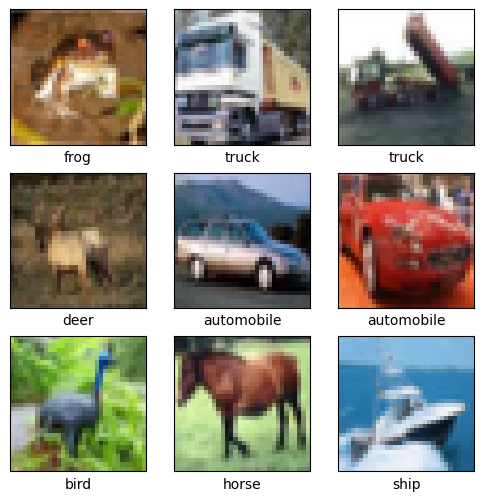

In [3]:
# dataset check
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3,3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_tr[i])

    plt.xlabel(class_names[y_tr[i][0]])
plt.show()

In [5]:
# model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

'''
    입력 (1, 32, 32, 3) = (batch, H, W, channels)
    합성곱 -> (1, 30, 30, 32)     (필터 = (3, 3, 3, 32))
    풀링 -> (1, 15, 15, 32)
    합성곱 -> (1, 13, 13, 64)     (필터 = (3, 3, 32, 64))
    풀링 -> (1, 6, 6, 64)         (왜 7,7이 아니라 6,6 일까? 남는 값은 버리나?)
    합성곱 -> (1, 4, 4, 64)       (필터 = (3, 3, 64, 64))
    평탄화 -> (1, 1024)
    밀집층 -> (1, 64)
    밀집층 -> (1, 10)
'''

/opt/homebrew/Caskroom/miniconda/base/envs/img2023/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-10-06 16:19:36.661586: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3
2024-10-06 16:19:36.661625: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-10-06 16:19:36.661634: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-10-06 16:19:36.661847: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-10-06 16:19:36.661865: I tensorflow/core/common_runtime/pluggable_device/plu

In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# hyper parameter
batch_size = 128
epochs = 10

model.compile(
    optimizer='adam',
    loss=losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [13]:
# train (** 중복 실행시 이전의 model.fit()의 bias, weight가 유지됨 -> )
history = model.fit(X_tr, y_tr, validation_data=(X_ts, y_ts),
                    batch_size=batch_size, epochs=epochs)

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.7745 - loss: 0.6541 - val_accuracy: 0.7173 - val_loss: 0.8229
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.7913 - loss: 0.6053 - val_accuracy: 0.7131 - val_loss: 0.8499
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 17s 42ms/step - accuracy: 0.7969 - loss: 0.5845 - val_accuracy: 0.7185 - val_loss: 0.8409
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 18s 45ms/step - accuracy: 0.8031 - loss: 0.5620 - val_accuracy: 0.7140 - val_loss: 0.8477
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 16s 42ms/step - accuracy: 0.8118 - loss: 0.5363 - val_accuracy: 0.7148 - val_loss: 0.8410
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 17s 45ms/step - accuracy: 0.8191 - loss: 0.5151 - val_accuracy: 0.7169 - val_loss: 0.8527
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - accuracy: 0.8335 - loss: 0.4788 - val_accuracy: 0.7106 - val_loss: 0.9098
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - accuracy: 0.8381 - loss: 0.4591 - v

In [9]:
tf.keras.backend.clear_session() # 세션 초기화 (모델 초기화)

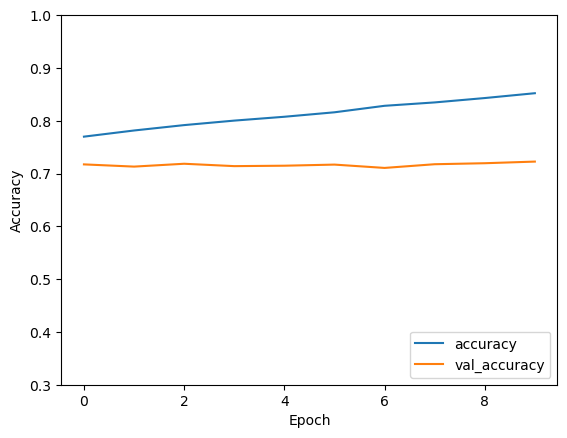

In [14]:
# plot acc
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.3, 1])
plt.legend(loc='lower right')

In [17]:
# test
test_loss, test_acc = model.evaluate(X_ts,  y_ts, verbose=2)

print('\n', test_acc)

313/313 - 1s - 4ms/step - accuracy: 0.6716 - loss: 0.9500

 0.6715999841690063


## 성능향상하기

1. 변경 사항들을 모델 구성에 적용하여 다양한 하이퍼파라미터 조합의 실험을 진행할 수 있습니다.

2. 실험을 통해 각 하이퍼파라미터가 모델 성능에 미치는 영향을 분석하는 것이 중요합니다. (즉, 여러번 실험해야 함)


        1. 학습률 (Learning Rate)
        - 낮은 학습률: 모델이 최적점에 도달하는데 더 오래 걸릴 수 있습니다. 하지만 너무 낮으면 학습이 충분히 진행되지 않을 수 있습니다.
        - 높은 학습률: 학습이 빠르게 진행되지만, 너무 높으면 최적점을 지나쳐 발산할 수 있습니다. 즉, 모델이 수렴하지 못하고 성능이 저하될 수 있습니다.


        2. 배치 크기 (Batch Size)
        - 작은 배치 크기: 더 자주 업데이트되어 학습이 빨라질 수 있지만, 불안정한 학습 경향을 보일 수 있습니다. 또한 과적합의 위험이 높아질 수 있습니다.
        - 큰 배치 크기: 메모리 사용량이 증가하고, 학습 시간이 감소할 수 있지만, 일반화 성능이 저하될 수 있습니다.


        3. 에포크 수 (Number of Epochs)
        - 적은 에포크 수: 모델이 충분히 학습되지 않아 성능이 낮을 수 있습니다.
        - 많은 에포크 수: 모델이 더 잘 학습되지만, 너무 많으면 과적합(모델이 훈련 데이터에 지나치게 최적화되어 새로운 데이터에서 성능이 저하됨)의 위험이 있습니다.


        4. 은닉층의 뉴런 수 (Number of Neurons in Hidden Layers)
        - 적은 뉴런 수: 모델이 데이터의 복잡성을 충분히 포착하지 못할 수 있습니다. 즉, 모델의 용량이 낮아져 학습이 제한될 수 있습니다.
        - 많은 뉴런 수: 모델이 더 복잡한 패턴을 학습할 수 있지만, 계산 비용이 증가하고 과적합의 위험이 높아질 수 있습니다.


        5. 드롭아웃 비율 (Dropout Rate)
        - 낮은 드롭아웃 비율: 드롭아웃의 효과가 미미할 수 있으며, 과적합의 위험이 존재합니다.
        - 높은 드롭아웃 비율: 과적합을 방지할 수 있지만, 너무 높으면 네트워크가 데이터의 중요한 패턴을 학습하는 데 방해가 될 수 있습니다.